In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('ds_salaries.csv')

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [378]:
df.isna()

work_year  experience_level  employment_type  job_title  salary  \
0         False             False            False      False   False   
1         False             False            False      False   False   
2         False             False            False      False   False   
3         False             False            False      False   False   
4         False             False            False      False   False   
...         ...               ...              ...        ...     ...   
3750      False             False            False      False   False   
3751      False             False            False      False   False   
3752      False             False            False      False   False   
3753      False             False            False      False   False   
3754      False             False            False      False   False   

      salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0               False          False               False         False   
1               False          False               False         False   
2               False          False               False         False   
3               False          False               False         False   
4               False          False               False         False   
...               ...            ...                 ...           ...   
3750            False          False               False         False   
3751            False          False               False         False   
3752            False          False               False         False   
3753            False          False               False         False   
3754            False          False               False         False   

      company_location  company_size  
0                False         False  
1                False         False  
2                False         False  
3                False         False  
4                False         False  
...                ...           ...  
3750             False         False  
3751             False         False  
3752             False         False  
3753             False         False  
3754             False         False  

[3755 rows x 11 columns]

In [379]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [380]:
df.shape

(3755, 11)

In [381]:
duplicates = df[df.duplicated(keep='last')]

# Drop the duplicate rows from the original dataframe
df_cleaned = df.drop_duplicates()

df_usa=df_cleaned[df_cleaned['company_location']=='US']

# Save the cleaned dataset to a new CSV file
df_usa.to_csv('cleaned_usa_data.csv', index=False)

In [382]:
df_usa.shape

(1929, 11)

In [383]:
df = pd.read_csv("cleaned_usa_data.csv")

In [384]:
df

work_year experience_level employment_type                 job_title  \
0          2023               MI              CT               ML Engineer   
1          2023               MI              CT               ML Engineer   
2          2023               SE              FT         Applied Scientist   
3          2023               SE              FT         Applied Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
1924       2021               SE              FT           Data Specialist   
1925       2020               SE              FT            Data Scientist   
1926       2021               MI              FT  Principal Data Scientist   
1927       2020               EN              FT            Data Scientist   
1928       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      30000             USD          30000                 US           100   
1      25500             USD          25500                 US           100   
2     222200             USD         222200                 US             0   
3     136000             USD         136000                 US             0   
4     147100             USD         147100                 US             0   
...      ...             ...            ...                ...           ...   
1924  165000             USD         165000                 US           100   
1925  412000             USD         412000                 US           100   
1926  151000             USD         151000                 US           100   
1927  105000             USD         105000                 US           100   
1928  100000             USD         100000                 US           100   

     company_location company_size  
0                  US            S  
1                  US            S  
2                  US            L  
3                  US            L  
4                  US            M  
...               ...          ...  
1924               US            L  
1925               US            L  
1926               US            L  
1927               US            S  
1928               US            L  

[1929 rows x 11 columns]

In [385]:
# Filter a subgroup of data with only entry level
df_EN = df[df['experience_level'] == 'EN'] 
df_EN['company_size'] = df_EN['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})

C:\Users\lijia\AppData\Local\Temp\ipykernel_22180\3366328274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EN['company_size'] = df_EN['company_size'].replace({


In [386]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

In [387]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [388]:
df

work_year        experience_level employment_type  \
0          2023  Mid/Intermediate level      Contractor   
1          2023  Mid/Intermediate level      Contractor   
2          2023                  Senior       Full-time   
3          2023                  Senior       Full-time   
4          2023                  Senior       Full-time   
...         ...                     ...             ...   
1924       2021                  Senior       Full-time   
1925       2020                  Senior       Full-time   
1926       2021  Mid/Intermediate level       Full-time   
1927       2020             Entry level       Full-time   
1928       2020             Entry level      Contractor   

                     job_title  salary salary_currency  salary_in_usd  \
0                  ML Engineer   30000             USD          30000   
1                  ML Engineer   25500             USD          25500   
2            Applied Scientist  222200             USD         222200   
3            Applied Scientist  136000             USD         136000   
4               Data Scientist  147100             USD         147100   
...                        ...     ...             ...            ...   
1924           Data Specialist  165000             USD         165000   
1925            Data Scientist  412000             USD         412000   
1926  Principal Data Scientist  151000             USD         151000   
1927            Data Scientist  105000             USD         105000   
1928     Business Data Analyst  100000             USD         100000   

     employee_residence remote_ratio company_location company_size  \
0                    US  Full-Remote               US        SMALL   
1                    US  Full-Remote               US        SMALL   
2                    US      On-Site               US        LARGE   
3                    US      On-Site               US        LARGE   
4                    US      On-Site               US       MEDIUM   
...                 ...          ...              ...          ...   
1924                 US  Full-Remote               US        LARGE   
1925                 US  Full-Remote               US        LARGE   
1926                 US  Full-Remote               US        LARGE   
1927                 US  Full-Remote               US        SMALL   
1928                 US  Full-Remote               US        LARGE   

          job_category  
0     Machine Learning  
1     Machine Learning  
2         Data Science  
3         Data Science  
4         Data Science  
...                ...  
1924             Other  
1925      Data Science  
1926             Other  
1927      Data Science  
1928  Data Engineering  

[1929 rows x 12 columns]

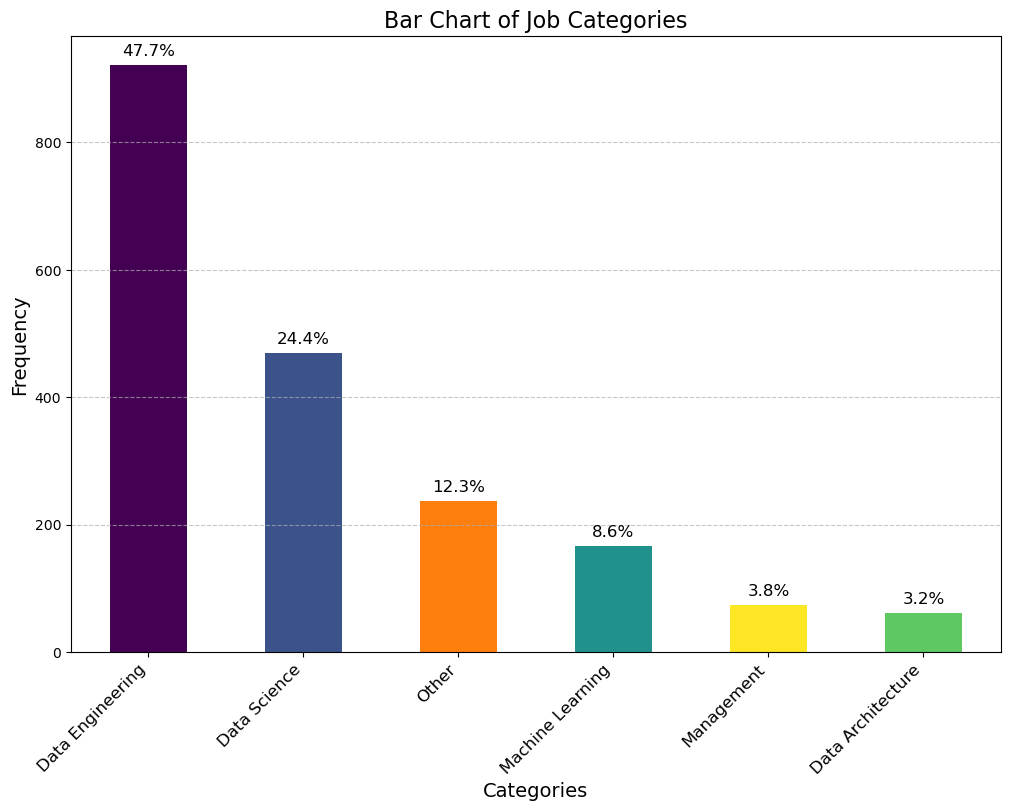

In [389]:
# Define a color palette for job categories
job_category_palette = {
    'Data Engineering': '#440154',  # Example color
    'Data Science': '#3b528b',      # Example color
    'Machine Learning': '#21918c',  # Example color
    'Data Architecture': '#5ec962', # Example color
    'Management': '#fde725',        # Example color
    'Other': '#ff7f0e'              # Example color
}

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart with the defined color palette
ax = df['job_category'].value_counts().plot(
    kind='bar', 
    color=[job_category_palette[category] for category in df['job_category'].value_counts().index]
)

# Add titles and labels
plt.title('Bar Chart of Job Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the percentage
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

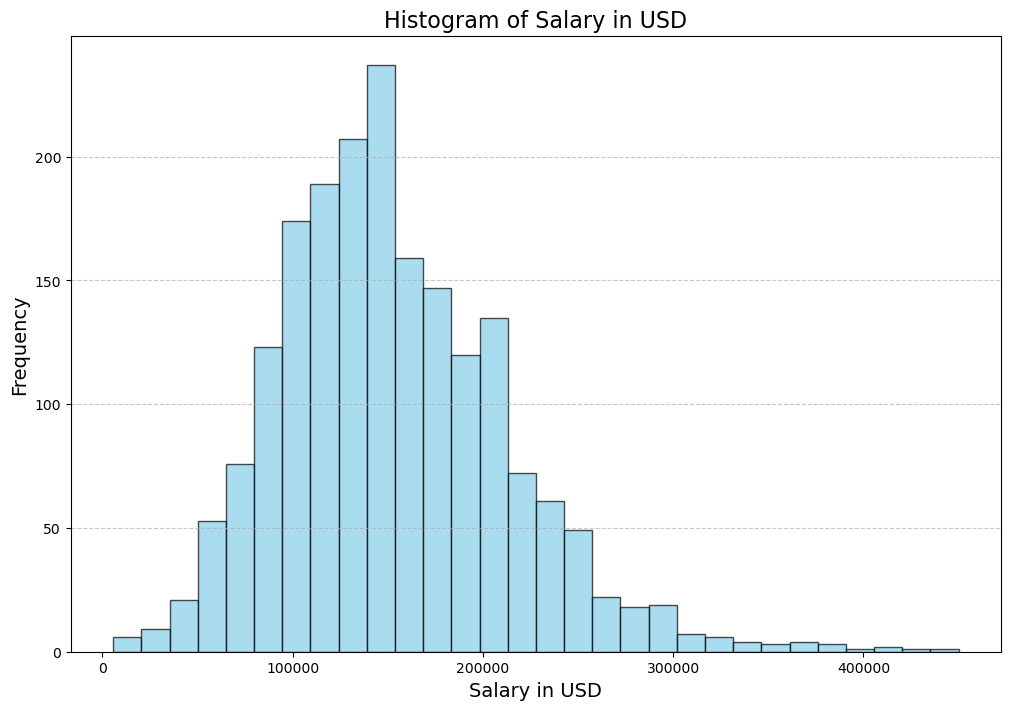

In [390]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the histogram with a colorful palette
df['salary_in_usd'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

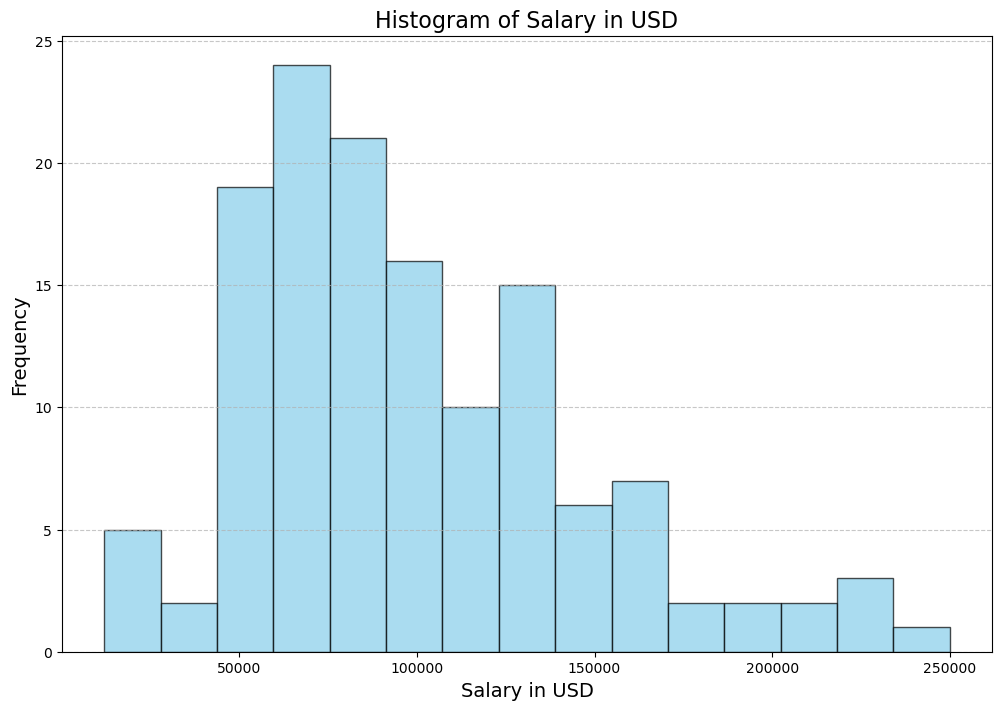

In [420]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the histogram with a colorful palette
df_EN['salary_in_usd'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

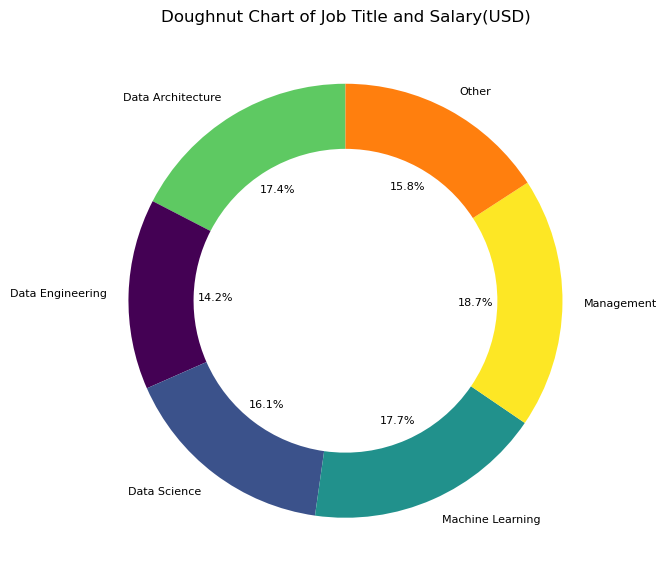

In [391]:
# Calculate the average of salary(USD) for each job title (10 counts or more)
job_title_salary = df.groupby('job_category')['salary_in_usd'].mean()

# Create the pie chart based on average salary(USD)
plt.figure(figsize=(7, 10))
plt.pie(
    job_title_salary, 
    labels=job_title_salary.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops=dict(width=0.3), 
    textprops={'fontsize': 8},
    colors=[job_category_palette[category] for category in job_title_salary.index]
)
plt.title('Doughnut Chart of Job Title and Salary(USD)')
plt.show()

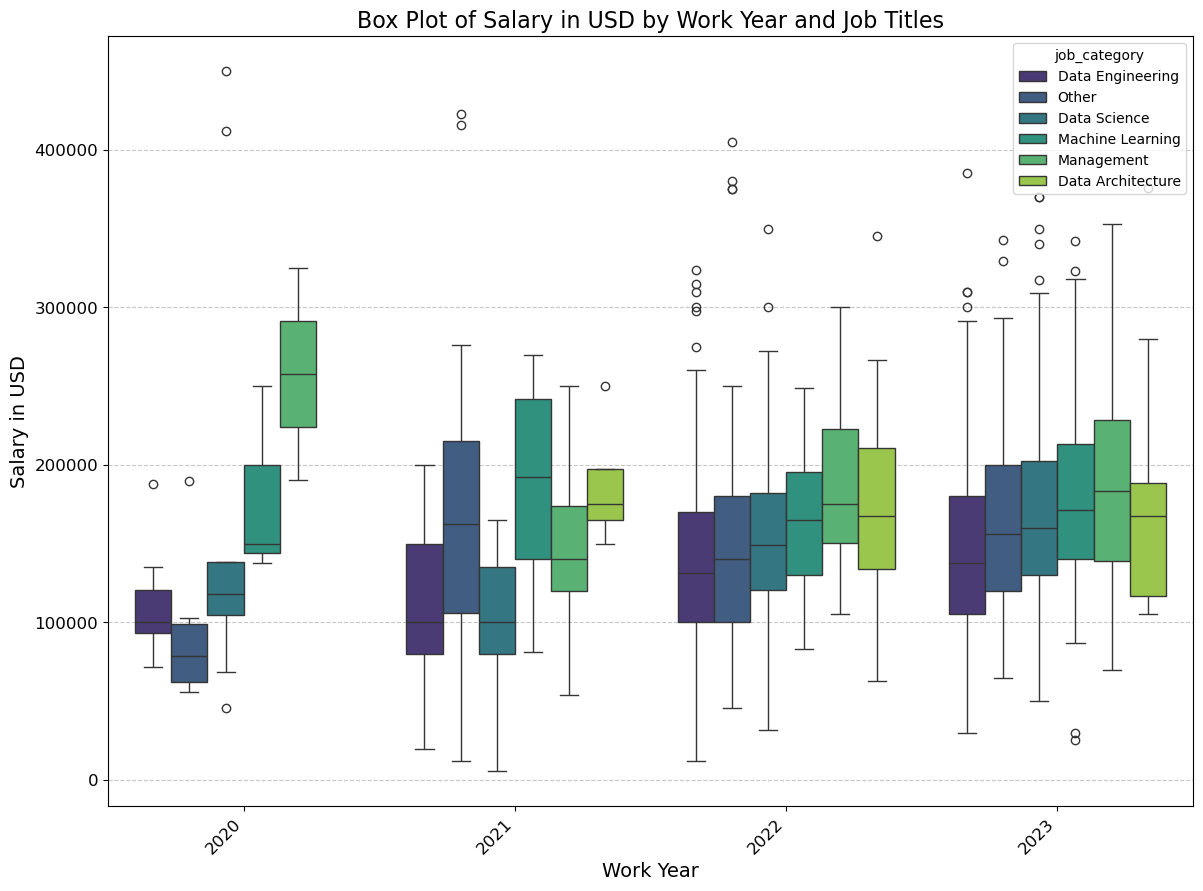

In [392]:
plt.figure(figsize=(14, 10))

# Create a box plot to visualize the relationship between work year, job titles, and salary
sns.boxplot(data=df, x='work_year', y='salary_in_usd', hue='job_category', palette='viridis')

# Add titles and labels
plt.title('Box Plot of Salary in USD by Work Year and Job Titles', fontsize=16)
plt.xlabel('Work Year', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

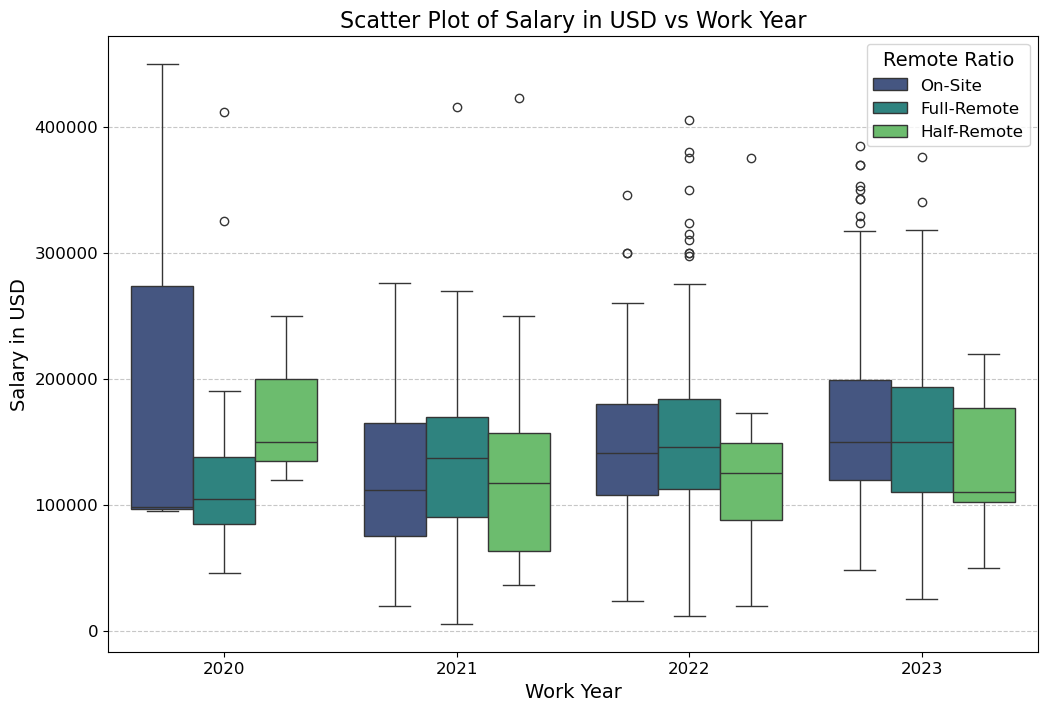

In [393]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette='viridis', hue='remote_ratio')
plt.title('Scatter Plot of Salary in USD vs Work Year', fontsize=16)
plt.xlabel('Work Year', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Remote Ratio', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\lijia\AppData\Local\Temp\ipykernel_22180\4217367597.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job_category', alpha=0.3, ax=ax2, palette=[job_category_palette[category] for category in df['job_category'].unique()])


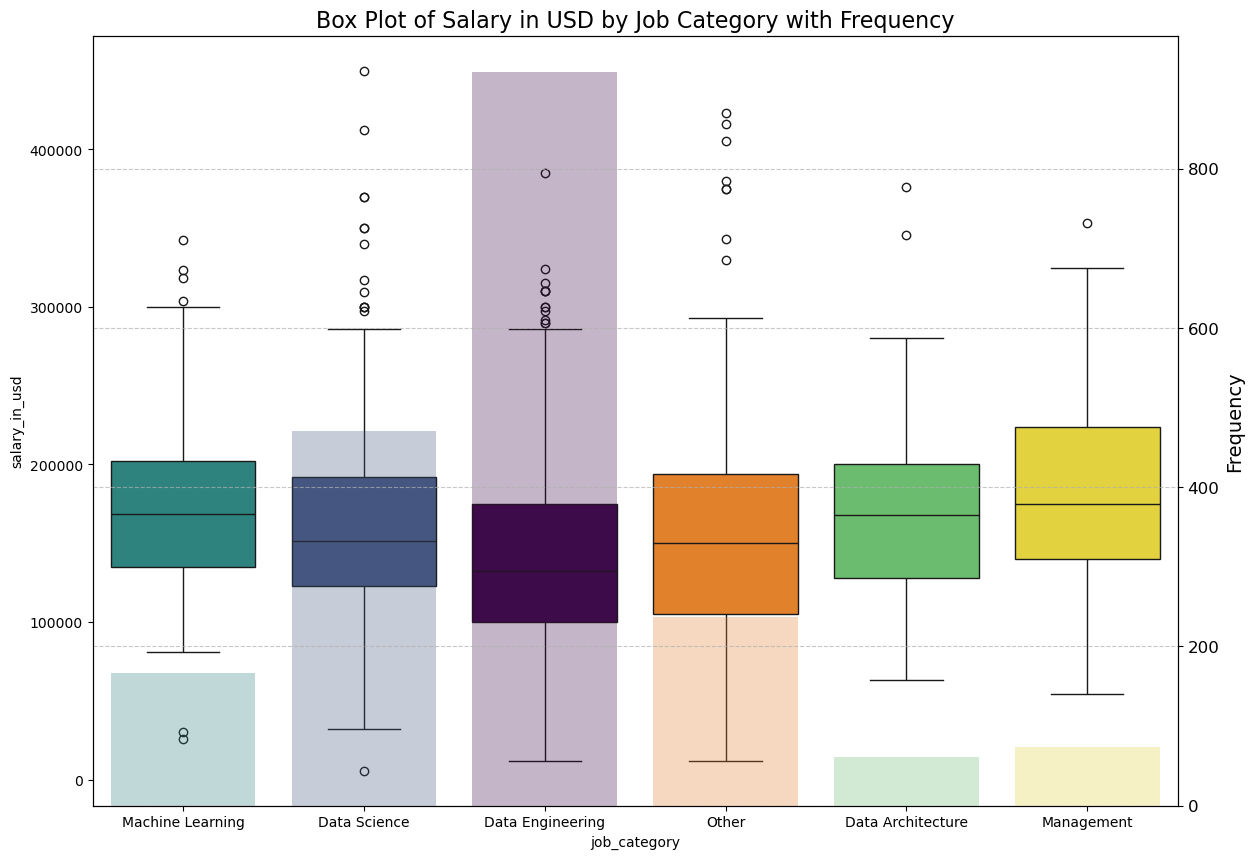

In [394]:
plt.figure(figsize=(14, 10))

# Create a box plot
sns.boxplot(data=df, x='job_category', y='salary_in_usd', palette=job_category_palette, hue='job_category', legend=False)

# Create a secondary y-axis for the frequency
ax2 = plt.twinx()

# Create a count plot on the secondary y-axis
sns.countplot(data=df, x='job_category', alpha=0.3, ax=ax2, palette=[job_category_palette[category] for category in df['job_category'].unique()])

# Add titles and labels
plt.title('Box Plot of Salary in USD by Job Category with Frequency', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


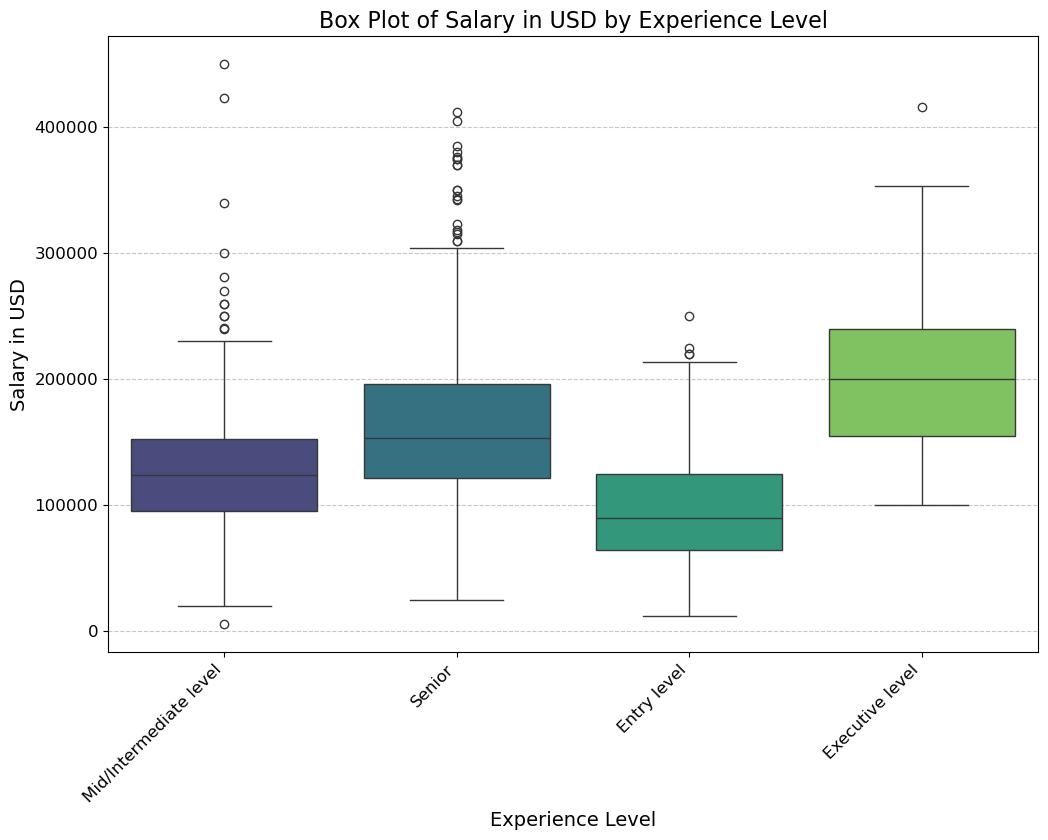

In [395]:
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the relationship between experience level and salary
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='viridis', hue='experience_level', legend=False)

# Add titles and labels
plt.title('Box Plot of Salary in USD by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

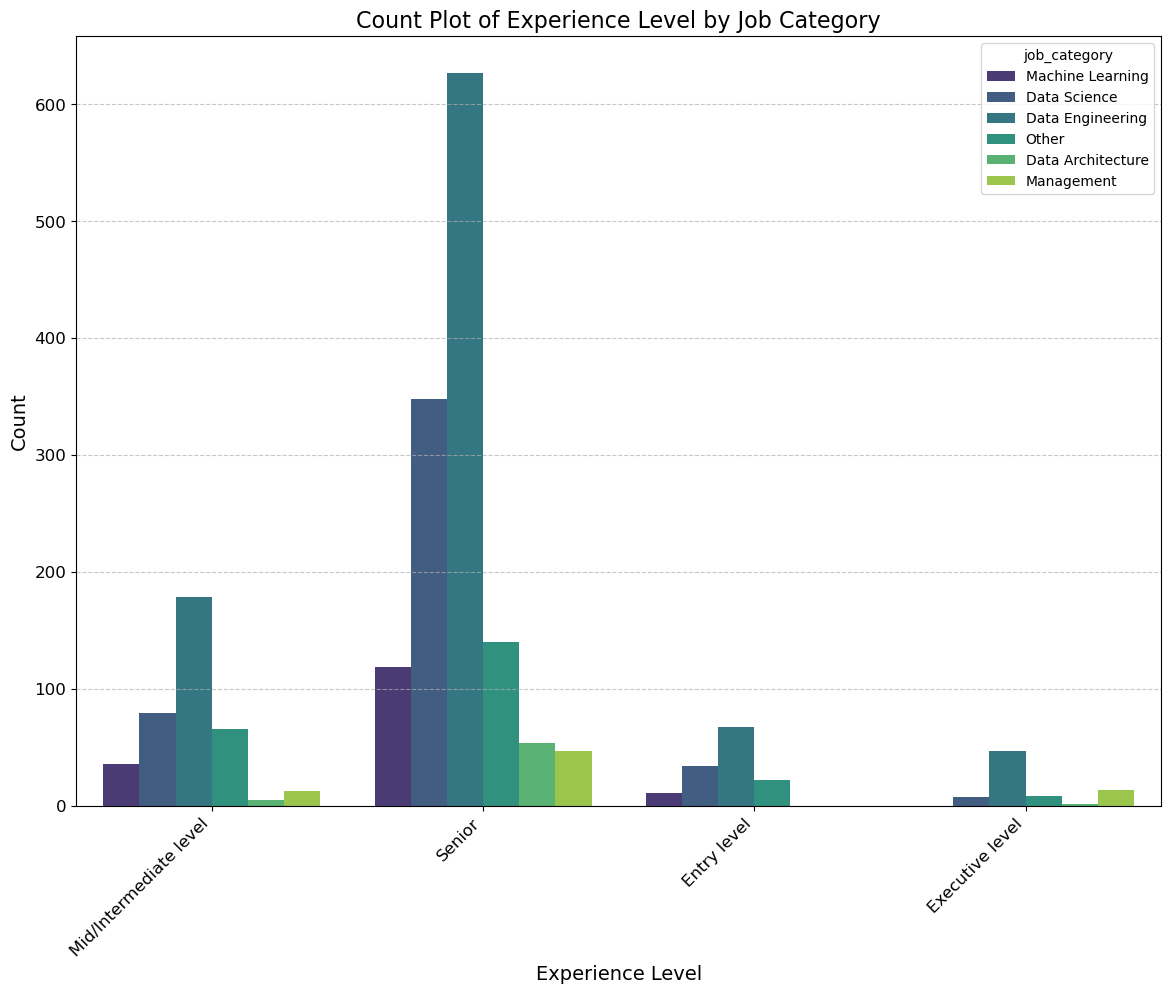

In [396]:
plt.figure(figsize=(14, 10))

# Create a count plot to visualize the relationship between experience level and job category
sns.countplot(data=df, x='experience_level', hue='job_category', palette='viridis')

# Add titles and labels
plt.title('Count Plot of Experience Level by Job Category', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


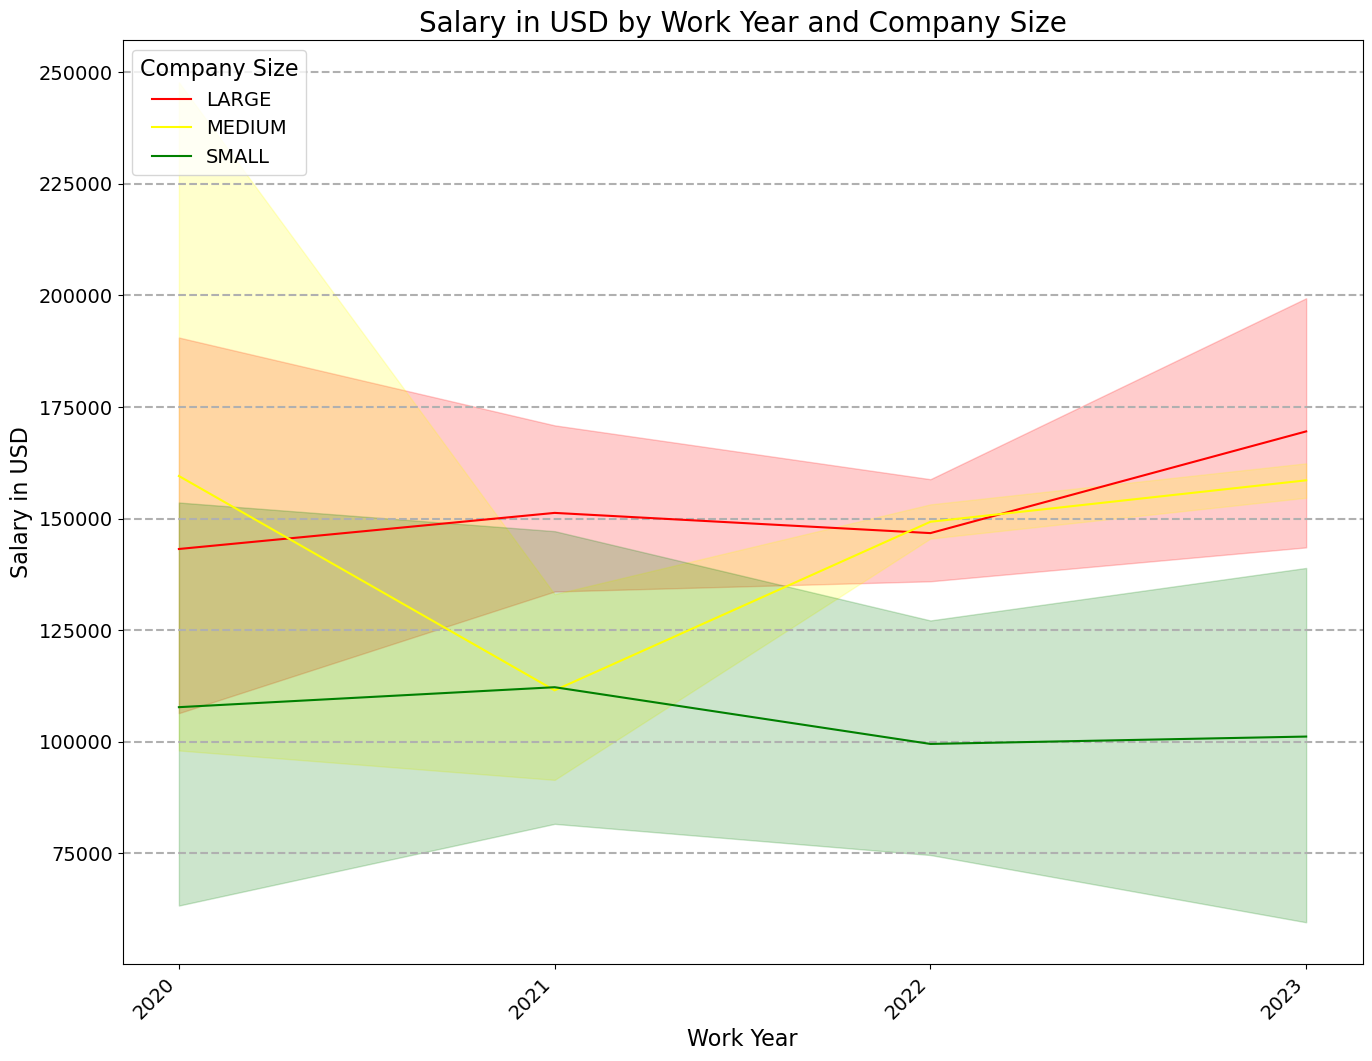

In [397]:
plt.figure(figsize=(16, 12))

# Set my own palette
custom_palette = {
    'LARGE': 'red',
    'MEDIUM': 'yellow',
    'SMALL': 'green'
}
            
# Plot the line plot for each company size
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', palette=custom_palette, hue_order=['LARGE', 'MEDIUM', 'SMALL'])

# Add titles and labels
plt.title('Salary in USD by Work Year and Company Size', fontsize=20)
plt.xlabel('Work Year', fontsize=16)
plt.ylabel('Salary in USD', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Ensure x-axis ticks are integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=1.0, linewidth=1.5)

# Adjust the legend
plt.legend(title='Company Size', fontsize=14, title_fontsize=16, loc='upper left')

# Show the plot
plt.show()

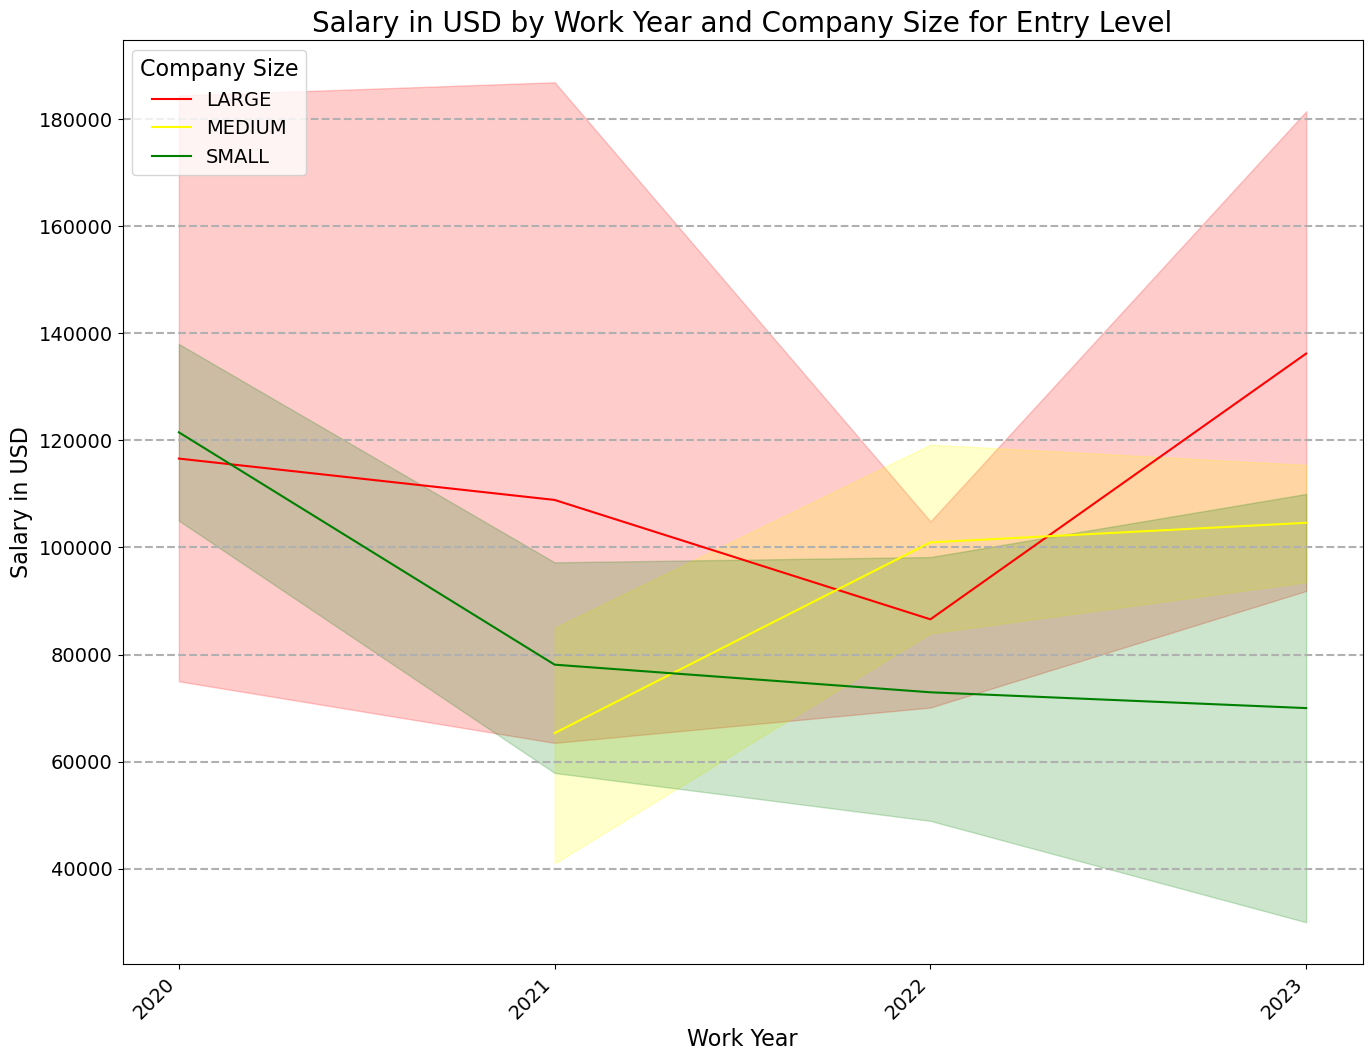

In [412]:
plt.figure(figsize=(16, 12))

# Set my own palette
custom_palette = {
    'LARGE': 'red',
    'MEDIUM': 'yellow',
    'SMALL': 'green'
}
# Plot the line plot for each company size
sns.lineplot(data=df_EN, x='work_year', y='salary_in_usd', hue='company_size', palette=custom_palette)

# Add titles and labels
plt.title('Salary in USD by Work Year and Company Size for Entry Level', fontsize=20)
plt.xlabel('Work Year', fontsize=16)
plt.ylabel('Salary in USD', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Ensure x-axis ticks are integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=1.0, linewidth=1.5)

# Adjust the legend
plt.legend(title='Company Size', fontsize=14, title_fontsize=16, loc='upper left')

# Show the plot
plt.show()

C:\Users\lijia\AppData\Local\Temp\ipykernel_22180\4018675901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='experience_level', y='salary_in_usd', palette='viridis')


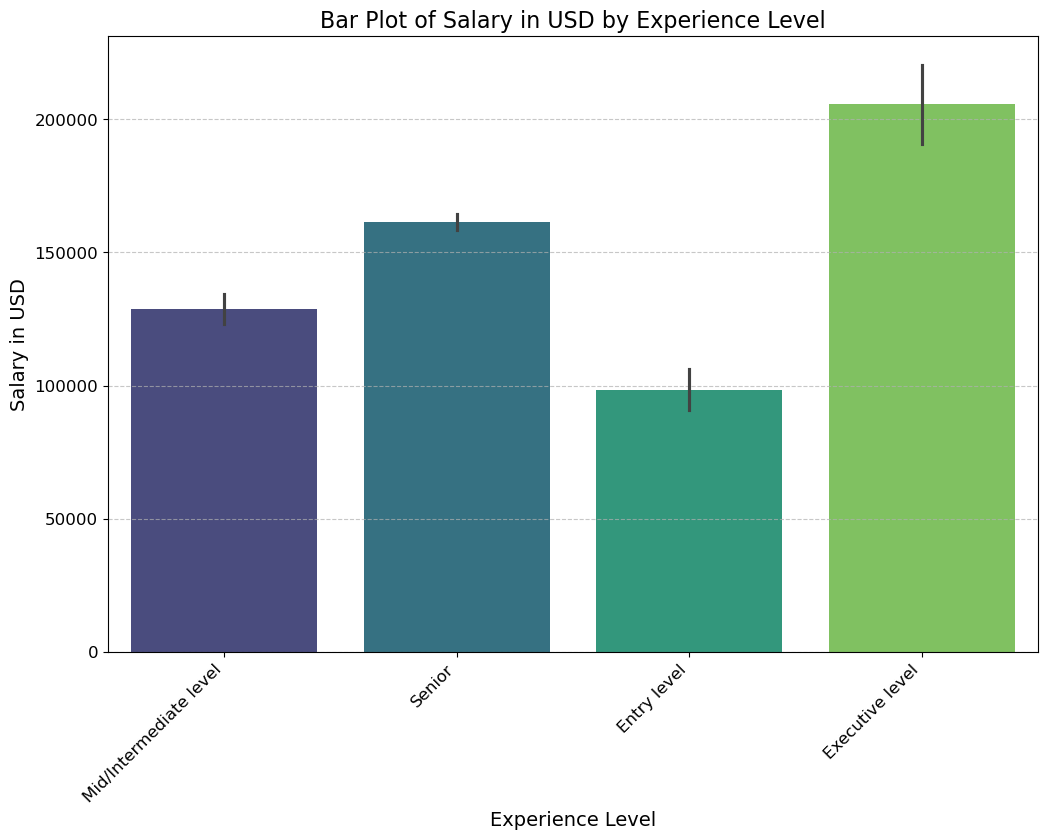

In [399]:
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=df, x='experience_level', y='salary_in_usd', palette='viridis')

# Add titles and labels
plt.title('Bar Plot of Salary in USD by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

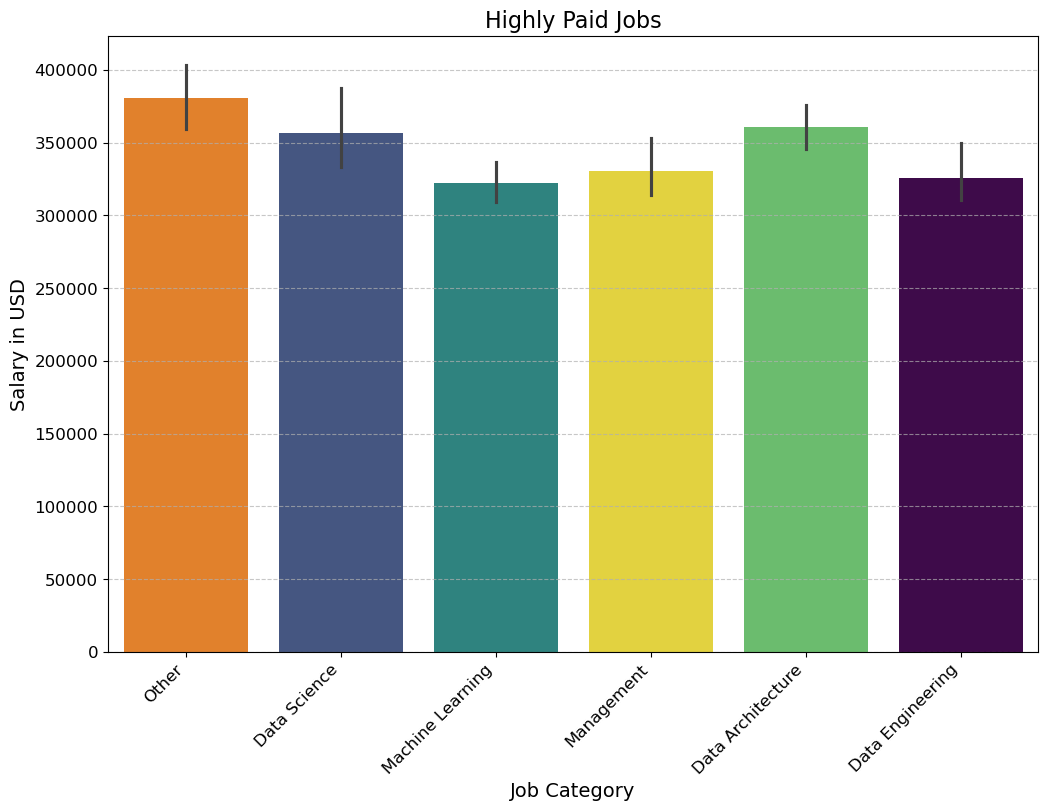

In [400]:
highly_paid_jobs = df[df['salary_in_usd'] > 300000]

plt.figure(figsize=(12, 8))
# Create a bar plot for highly paid jobs with the specified colors
sns.barplot(
    data=highly_paid_jobs, 
    x='job_category', 
    y='salary_in_usd', 
    palette=[job_category_palette[category] for category in highly_paid_jobs['job_category'].unique()],
    hue='job_category', 
    dodge=False
)

# Add titles and labels
plt.title('Highly Paid Jobs', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


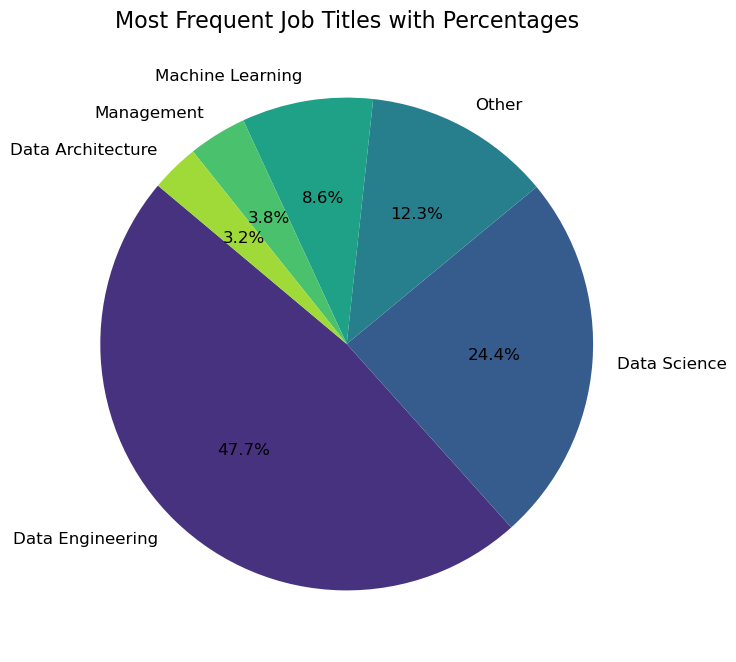

In [401]:
# Get the most frequent job titles
most_frequent_job_titles = df['job_category'].value_counts().head(10)
# most_frequent_job_titles = df['job_title'].value_counts().head(10) we can do for both


# Calculate the percentage of each job title
most_frequent_job_titles_percentage = most_frequent_job_titles / most_frequent_job_titles.sum() * 100

# Plot the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    most_frequent_job_titles_percentage, 
    labels=most_frequent_job_titles.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(most_frequent_job_titles))
)

# Add a title
plt.title('Most Frequent Job Titles with Percentages', fontsize=16)

# Adjust the text size
for text in texts + autotexts:
    text.set_fontsize(12)

# Show the plot
plt.show()



In [402]:
df

work_year        experience_level employment_type  \
0          2023  Mid/Intermediate level      Contractor   
1          2023  Mid/Intermediate level      Contractor   
2          2023                  Senior       Full-time   
3          2023                  Senior       Full-time   
4          2023                  Senior       Full-time   
...         ...                     ...             ...   
1924       2021                  Senior       Full-time   
1925       2020                  Senior       Full-time   
1926       2021  Mid/Intermediate level       Full-time   
1927       2020             Entry level       Full-time   
1928       2020             Entry level      Contractor   

                     job_title  salary salary_currency  salary_in_usd  \
0                  ML Engineer   30000             USD          30000   
1                  ML Engineer   25500             USD          25500   
2            Applied Scientist  222200             USD         222200   
3            Applied Scientist  136000             USD         136000   
4               Data Scientist  147100             USD         147100   
...                        ...     ...             ...            ...   
1924           Data Specialist  165000             USD         165000   
1925            Data Scientist  412000             USD         412000   
1926  Principal Data Scientist  151000             USD         151000   
1927            Data Scientist  105000             USD         105000   
1928     Business Data Analyst  100000             USD         100000   

     employee_residence remote_ratio company_location company_size  \
0                    US  Full-Remote               US        SMALL   
1                    US  Full-Remote               US        SMALL   
2                    US      On-Site               US        LARGE   
3                    US      On-Site               US        LARGE   
4                    US      On-Site               US       MEDIUM   
...                 ...          ...              ...          ...   
1924                 US  Full-Remote               US        LARGE   
1925                 US  Full-Remote               US        LARGE   
1926                 US  Full-Remote               US        LARGE   
1927                 US  Full-Remote               US        SMALL   
1928                 US  Full-Remote               US        LARGE   

          job_category  
0     Machine Learning  
1     Machine Learning  
2         Data Science  
3         Data Science  
4         Data Science  
...                ...  
1924             Other  
1925      Data Science  
1926             Other  
1927      Data Science  
1928  Data Engineering  

[1929 rows x 12 columns]

In [403]:
df['experience_level'] = df['experience_level'].replace({
    'Senior': 3,
    'Entry level': 1,
    'Executive level': 4,
    'Mid/Intermediate level': 2,
})

df['employment_type'] = df['employment_type'].replace({
    'Freelancer': 1,
    'Contractor': 2,
    'Full-time': 3,
    'Part-time': 4
})

df['company_size'] = df['company_size'].replace({
    'SMALL': 1,
    'MEDIUM': 2,
    'LARGE': 3,
})

df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    'On-Site': 0,
    'Half-Remote': 50,
    'Full-Remote': 100,
})
df['job_category'] = df['job_category'].replace({
    'Data Engineering': 1,
    'Data Science': 2,
    'Machine Learning': 3,
    'Data Architecture': 4,
    'Management': 5,
    'Other': 6
})

C:\Users\lijia\AppData\Local\Temp\ipykernel_22180\610050977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({
C:\Users\lijia\AppData\Local\Temp\ipykernel_22180\610050977.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['employment_type'] = df['employment_type'].replace({
C:\Users\lijia\AppData\Local\Temp\ipykernel_22180\610050977.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior,

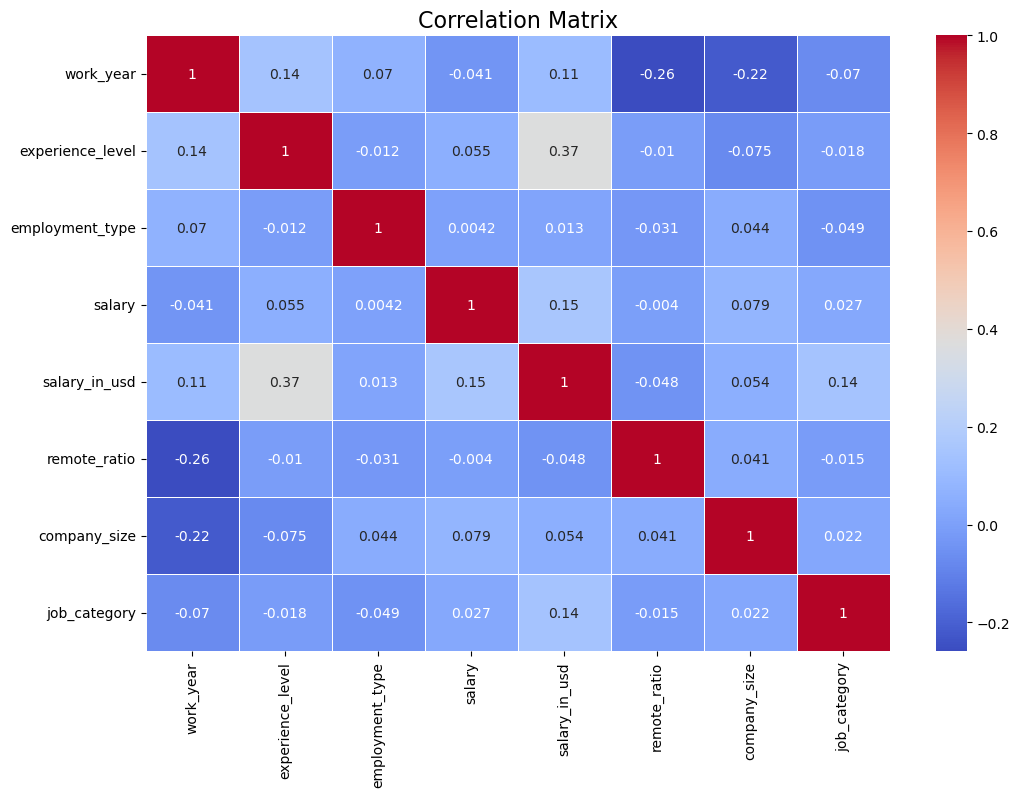

In [404]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [405]:
small_company_count = df[df['company_size'] == 1].shape[0]
print(f"Number of small companies: {small_company_count}")

Number of small companies: 53


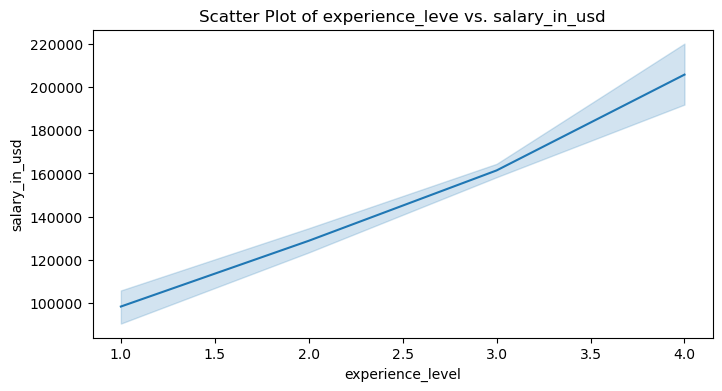

Correlation between experience_level and salary_in_usd: 0.37
                            OLS Regression Results                            
Dep. Variable:       experience_level   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     299.9
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.48e-62
Time:                        22:47:12   Log-Likelihood:                -1785.6
No. Observations:                1929   AIC:                             3575.
Df Residuals:                    1927   BIC:                             3586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [406]:
import statsmodels.formula.api as smf
import scipy.stats as stats

# Create a scatter plot
plt.figure(figsize=(8, 4))
sns.lineplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Scatter Plot of experience_leve vs. salary_in_usd')
plt.xlabel('experience_level')
plt.ylabel('salary_in_usd')
plt.show()

# Calculate the correlation between 'StudyHours_PerWeek' and 'Final_Grade'
correlation = df['experience_level'].corr(df['salary_in_usd'])

# Print the correlation score
print(f"Correlation between experience_level and salary_in_usd: {correlation:.2f}")

# Fit a linear regression model
model = smf.ols('experience_level ~ salary_in_usd', data=df).fit()

# Print the model summary
print(model.summary())

# Extract the p-value and R-squared score
p_value = model.pvalues['salary_in_usd']
r_squared = model.rsquared

# Print the p-value and R-squared score
print(f"P-value: {p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")

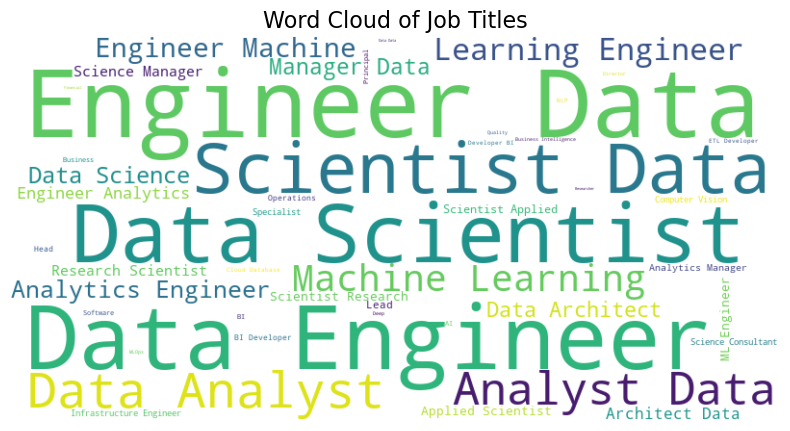

In [407]:
from wordcloud import WordCloud

# Combine all job titles into a single string
job_titles = ' '.join(df['job_title'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles', fontsize=16)
plt.show()

In [408]:
job_postings = pd.read_csv('job_postings.csv')
job_skills = pd.read_csv('job_skills.csv')
job_summary = pd.read_csv('job_summary.csv')
# postings = pd.read_csv('postings.csv')

# postings.rename(columns={'job_posting_url': 'job_posting_url'}, inplace=True)


# Inspect column names of each DataFrame
# print("job_postings columns:", job_postings.columns)
# print("job_skills columns:", job_skills.columns)
# print("job_summary columns:", job_summary.columns)
# print("postings columns:", postings.columns)

# Merge the dataframes on the common key (assuming 'job_id' is the common key)
combined_df = job_postings.merge(job_skills, on='job_link') \
                          .merge(job_summary, on='job_link') 
                        #   .merge(postings, left_on='job_link', right_on='job_posting_url')

# Set pandas options to display more columns
pd.set_option('display.max_columns', None)

# Display the combined dataframe
print(combined_df.head())
combined_df

                                            job_link  \
0  https://www.linkedin.com/jobs/view/senior-mach...   
1  https://www.linkedin.com/jobs/view/principal-s...   
2  https://www.linkedin.com/jobs/view/senior-etl-...   
3  https://www.linkedin.com/jobs/view/senior-data...   
4  https://www.linkedin.com/jobs/view/lead-data-e...   

             last_processed_time   last_status got_summary got_ner  \
0  2024-01-21 08:08:48.031964+00  Finished NER           t       t   
1  2024-01-20 04:02:12.331406+00  Finished NER           t       t   
2  2024-01-21 08:08:31.941595+00  Finished NER           t       t   
3  2024-01-20 15:30:55.796572+00  Finished NER           t       t   
4  2024-01-21 08:08:58.312124+00  Finished NER           t       t   

  is_being_worked                                     job_title  \
0               f              Senior Machine Learning Engineer   
1               f  Principal Software Engineer, ML Accelerators   
2               f          Senior ETL Dat

job_link  \
0      https://www.linkedin.com/jobs/view/senior-mach...   
1      https://www.linkedin.com/jobs/view/principal-s...   
2      https://www.linkedin.com/jobs/view/senior-etl-...   
3      https://www.linkedin.com/jobs/view/senior-data...   
4      https://www.linkedin.com/jobs/view/lead-data-e...   
...                                                  ...   
12212  https://uk.linkedin.com/jobs/view/data-reporti...   
12213  https://www.linkedin.com/jobs/view/corporate-a...   
12214  https://www.linkedin.com/jobs/view/senior-data...   
12215  https://www.linkedin.com/jobs/view/senior-data...   
12216  https://www.linkedin.com/jobs/view/medical-tec...   

                 last_processed_time   last_status got_summary got_ner  \
0      2024-01-21 08:08:48.031964+00  Finished NER           t       t   
1      2024-01-20 04:02:12.331406+00  Finished NER           t       t   
2      2024-01-21 08:08:31.941595+00  Finished NER           t       t   
3      2024-01-20 15:30:55.796572+00  Finished NER           t       t   
4      2024-01-21 08:08:58.312124+00  Finished NER           t       t   
...                              ...           ...         ...     ...   
12212  2024-01-21 07:11:22.099082+00  Finished NER           t       t   
12213  2024-01-19 15:10:41.177008+00  Finished NER           t       t   
12214  2024-01-20 15:20:19.036168+00  Finished NER           t       t   
12215  2024-01-19 23:25:28.107523+00  Finished NER           t       t   
12216  2024-01-19 23:26:27.593516+00  Finished NER           t       t   

      is_being_worked                                     job_title  \
0                   f              Senior Machine Learning Engineer   
1                   f  Principal Software Engineer, ML Accelerators   
2                   f          Senior ETL Data Warehouse Specialist   
3                   f   Senior Data Warehouse Developer / Architect   
4                   f                            Lead Data Engineer   
...               ...                                           ...   
12212               f  Data Reporting Manager, FOOTBALL ASSOCIATION   
12213               f  Corporate AML Alert Investigation Specialist   
12214               f                         Senior Data Scientist   
12215               f                          Senior Data Engineer   
12216               f              Medical Technologist, MLS or MLT   

                                   company                      job_location  \
0                        Jobs for Humanity                     New Haven, CT   
1                                   Aurora                 San Francisco, CA   
2                       Adame Services LLC                      New York, NY   
3                         Morph Enterprise                    Harrisburg, PA   
4                                     Dice                         Plano, TX   
...                                    ...                               ...   
12212                        Guardian Jobs  Wembley, England, United Kingdom   
12213                Glacier Bancorp, Inc.                     Kalispell, MT   
12214                             Highnote                 San Francisco, CA   
12215  CompSource Mutual Insurance Company                 Oklahoma City, OK   
12216             Community Health Systems                   Mooresville, NC   

       first_seen   search_city  search_country  \
0      2024-01-14    East Haven   United States   
1      2024-01-14    El Cerrito   United States   
2      2024-01-14    Middletown   United States   
3      2024-01-12       Lebanon   United States   
4      2024-01-14      McKinney   United States   
...           ...           ...             ...   
12212  2024-01-16  High Wycombe  United Kingdom   
12213  2024-01-14       Montana   United States   
12214  2024-01-16    San Rafael   United States   
12215  2024-01-16       Arcadia   United States   
12216  2024-01-14     Salisbury   United States   

           

In [409]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the job_skills column
job_skills_matrix = vectorizer.fit_transform(combined_df['job_skills'].dropna())

# Convert the matrix to a DataFrame for better readability
job_skills_df = pd.DataFrame(job_skills_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the DataFrame
job_skills_df.head()

00  00a  00pm  01  010  01m  02  02r  03  031  08  10  100  100000  \
0   0    0     0   0    0    0   0    0   0    0   0   0    0       0   
1   0    0     0   0    0    0   0    0   0    0   0   0    0       0   
2   0    0     0   0    0    0   0    0   0    0   0   0    0       0   
3   0    0     0   0    0    0   0    0   0    0   0   0    0       0   
4   0    0     0   0    0    0   0    0   0    0   0   0    0       0   

   10001500  10007  1000x  101  1013  1014  1015  102400  104  1042  1067s  \
0         0      0      0    0     0     0     0       0    0     0      0   
1         0      0      0    0     0     0     0       0    0     0      0   
2         0      0      0    0     0     0     0       0    0     0      0   
3         0      0      0    0     0     0     0       0    0     0      0   
4         0      0      0    0     0     0     0       0    0     0      0   

   107  1083  1099  10g  10hour  10key  10th  10week  10x  11  1100  110500  \
0    0     0     0    0       0      0     0       0    0   0     0       0   
1    0     0     0    0       0      0     0       0    0   0     0       0   
2    0     0     0    0       0      0     0       0    0   0     0       0   
3    0     0     0    0       0      0     0       0    0   0     0       0   
4    0     0     0    0       0      0     0       0    0   0     0       0   

   11202v3  115000  1157  1158  1163  11a  11g  11gr2  11p  12  120  120000  \
0        0       0     0     0     0    0    0      0    0   0    0       0   
1        0       0     0     0     0    0    0      0    0   0    0       0   
2        0       0     0     0     0    0    0      0    0   0    0       0   
3        0       0     0     0     0    0    0      0    0   1    0       0   
4        0       0     0     0     0    0    0      0    0   0    0       0   

   1215  1218  12b  12c  12digit  12factor  12g  12hour  12kv  12l  12m  \
0     0     0    0    0        0         0    0       0     0    0    0   
1     0     0    0    0        0         0    0       0     0    0    0   
2     0     0    0    0        0         0    0       0     0    0    0   
3     0     0    0    0        0         0    0       0     0    0    0   
4     0     0    0    0        0         0    0       0     0    0    0   

   12month  13  13485  135000  139000  1394  13c  14  14001  14042  14155  \
0        0   0      0       0       0     0    0   0      0      0      0   
1        0   0      0       0       0     0    0   0      0      0      0   
2        0   0      0       0       0     0    0   0      0      0      0   
3        0   0      0       0       0     0    0   0      0      0      0   
4        0   0      0       0       0     0    0   0      0      0      0   

   14224  1423  14712000  1489  15  150  1500  150000  150k  150m  15189  \
0      0     0         0     0   0    0     0       0     0     0      0   
1      0     0         0     0   0    0     0       0     0     0      0   
2      0     0         0     0   0    0     0       0     0     0      0   
3      0     0         0     0   0    0     0       0     0     0      0   
4      0     0         0     0   0    0     0       0     0     0      0   

   1519  157100  16  160000  16949  17  17025  172800  174  17th  18  180  \
0     0       0   0       0      0   0      0       0    0     0   0    0   
1     0       0   0       0      0   0      0       0    0     0   0    0   
2     0       0   0       0      0   0      0       0    0     0   0    0   
3     0       0   0       0      0   0      0       0    0     0   0    0   
4     0       0   0       0      0   0      0       0    0     0   0    0   

   180000  187700  18947  18c  18th  19  190000  1909  192  195  1975  1997  \
0       0       0      0    0     0   0       0     0    0    0     0     0   
1       0       0      0    0     0   0       0     0    0    0     0     0   
2       0       0      0    0     0   0       0     0    0    0     0     

In [410]:
from textblob import TextBlob

# Function to get the sentiment of a text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'job_summary' column
combined_df['sentiment'] = combined_df['job_summary'].apply(get_sentiment)

# Display the first few rows with sentiment scores
combined_df[['job_summary', 'sentiment']].head()

job_summary  sentiment
0  Company Description\nJobs for Humanity is part...   0.092094
1  Who We Are\nAurora (Nasdaq: AUR) is delivering...   0.134830
2  Location: New York City, NY\nPosition Summary\...   0.357684
3  Responsibilities:\nCandidate must have signifi...   0.184649
4  Dice is the leading career destination for tec...   0.093118

In [411]:
# Define the job title or job link you are interested in
job_titles_and_links = {
    "Senior Data Warehouse Developer": "https://www.linkedin.com/jobs/view/senior-data-warehouse-developer",
    "Senior Machine Learning Engineer": "https://www.linkedin.com/jobs/view/senior-machine-learning-engineer",
    "Principal Software Engineer, ML Accelerators": "https://www.linkedin.com/jobs/view/principal-software-engineer-ml-accelerators",
    "Senior ETL Data Warehouse Specialist": "https://www.linkedin.com/jobs/view/senior-etl-data-warehouse-specialist",
    "Lead Data Engineer": "https://www.linkedin.com/jobs/view/lead-data-engineer"
}

# Select the job title you are interested in
job_title_of_interest = "Senior Data Warehouse Developer"

# Filter the job_skills DataFrame based on the job title
skills_for_job_title = job_skills[job_skills['job_link'].isin([link for title, link in job_titles_and_links.items() if title == job_title_of_interest])]

# Extract and display the skills required for the job
skills_list = skills_for_job_title['job_skills'].tolist()
for skills in skills_list:
    print(skills)